In [3]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import data

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
from pandas_datareader import DataReader


In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,108.446235,105.445866,107.031703,106.991494,1.407508e+08,106.669387
std,22.703547,22.071078,22.567028,22.339907,5.565857e+07,22.460361
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,89.502499,87.779999,88.486252,88.308750,1.018588e+08,87.866695
50%,116.400002,113.550003,115.010002,115.040001,1.279593e+08,114.670517
75%,125.474998,121.689999,124.195000,124.180000,1.665000e+08,123.980274
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-23 to 2021-03-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


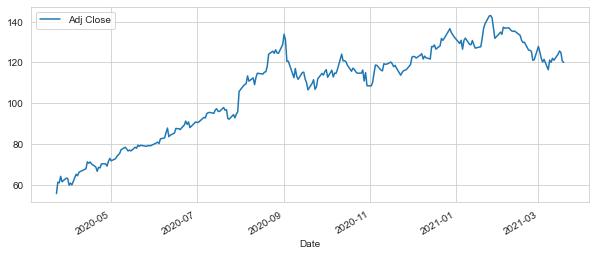

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

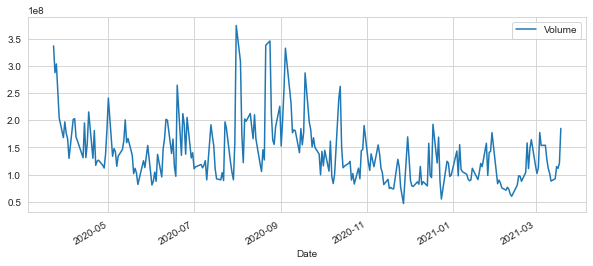

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
ma_day = [10,20,50]
m=pd.Series([10,20,50])

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]= pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

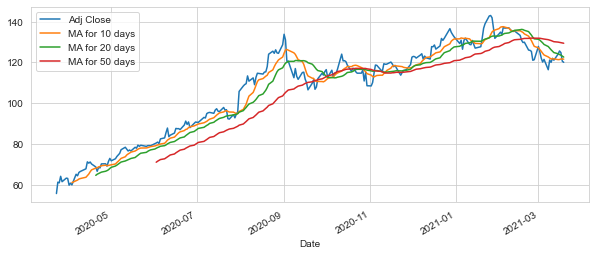

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

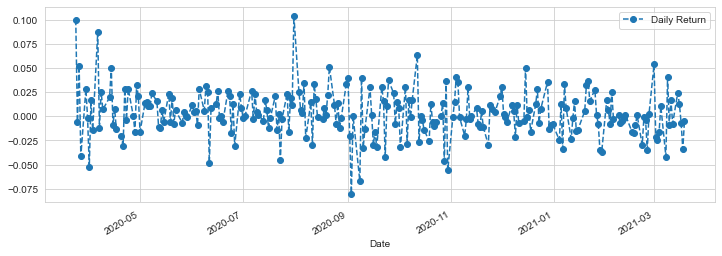

In [17]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

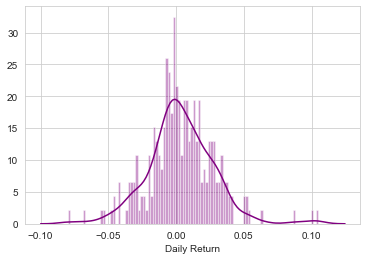

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [19]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-23,55.661041,1056.619995,134.612076,1902.829956
2020-03-24,61.245258,1134.459961,146.847717,1940.099976
2020-03-25,60.907871,1102.489990,145.442017,1885.839966
2020-03-26,64.113029,1161.750000,154.539566,1955.489990
2020-03-27,61.458603,1110.709961,148.194046,1900.099976


In [21]:
tech_rets = closing_df.pct_change()

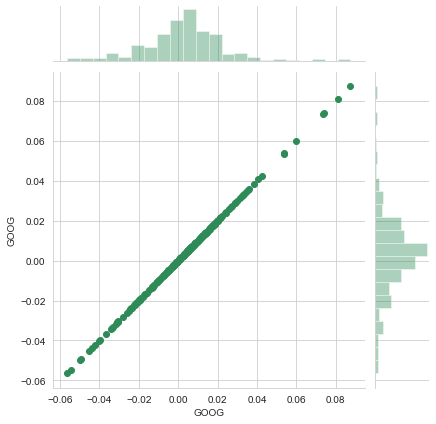

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

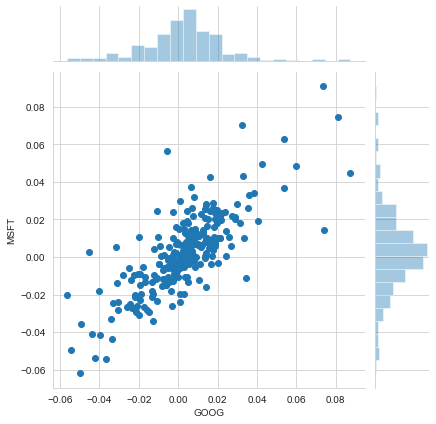

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')


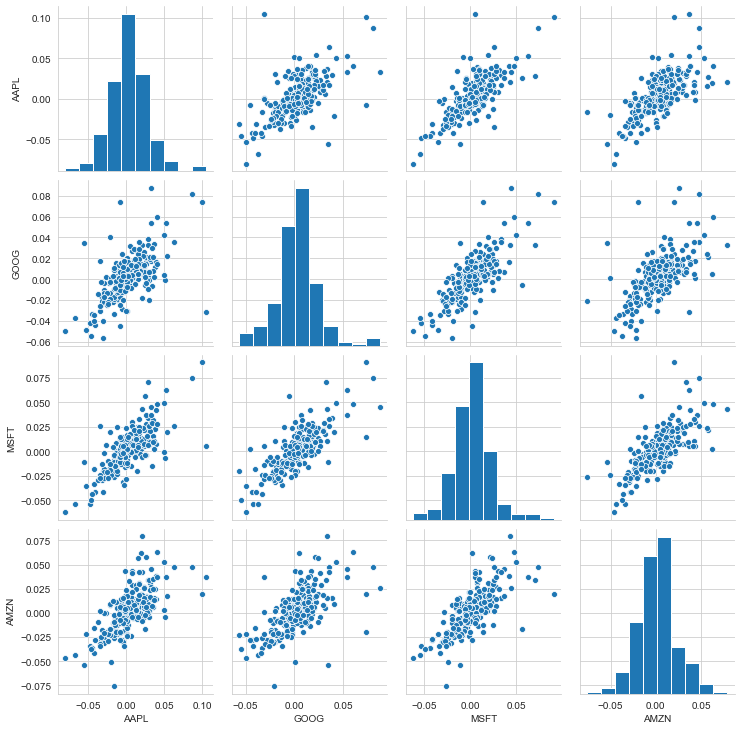

In [24]:
sns.pairplot(tech_rets.dropna())

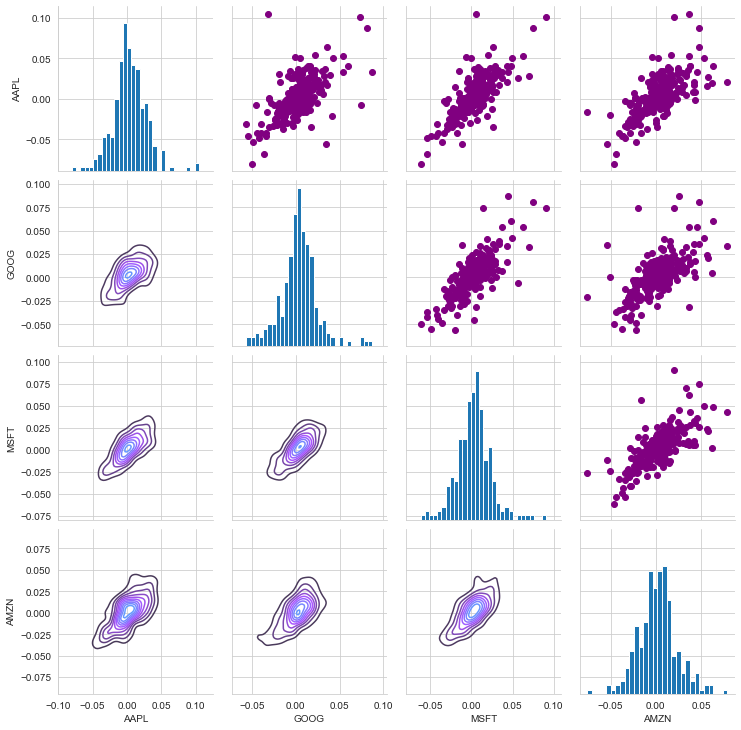

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


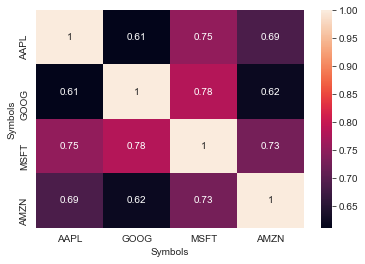

In [26]:
sns.heatmap(tech_rets.corr(), annot=True)

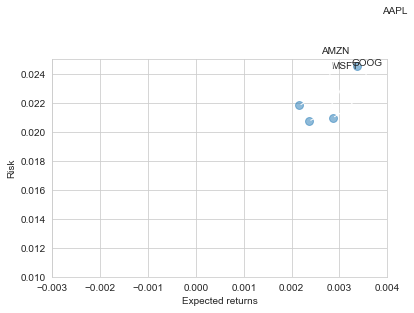

In [27]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

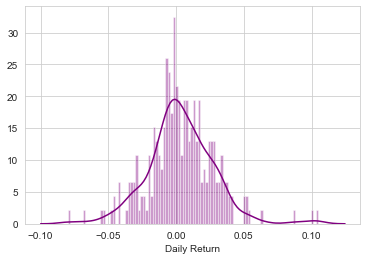

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [34]:
rets['AAPL'].quantile(0.05)

-0.034387743544981586

In [32]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

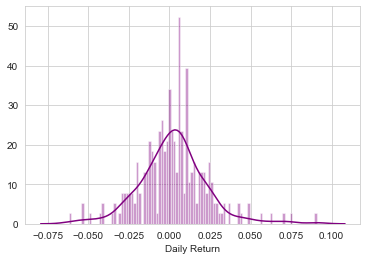

In [33]:
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
rets['MSFT'].quantile(0.05)

-0.02884330299139158

In [36]:
rets['AMZN'].quantile(0.05)

-0.030561138866582186

In [37]:
rets['GOOG'].quantile(0.05)

-0.032443918837233236

In [38]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

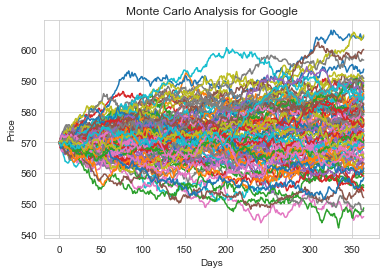

In [41]:
start_price = 569.85
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [42]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

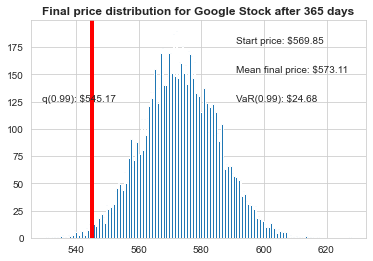

In [43]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [65]:
non_tech=['HIBB', 'KBH']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for i in non_tech:   
    globals()[i] = DataReader(i,'yahoo',start,end)

In [66]:
closing_dff = DataReader(non_tech,'yahoo',start,end)['Adj Close']
non_tech_rets = closing_dff.pct_change()

In [67]:
retss = non_tech_rets.dropna()

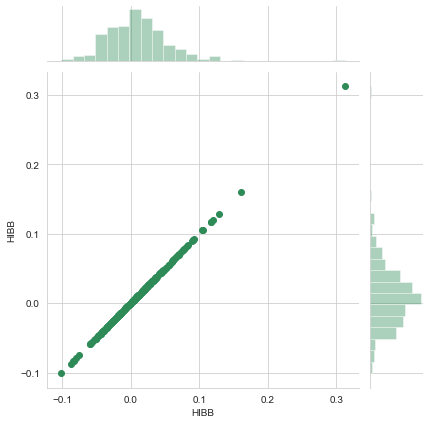

In [76]:
sns.jointplot('HIBB','HIBB',non_tech_rets,kind='scatter',color='seagreen')

In [78]:
HIBB['Daily Return'] = HIBB['Adj Close'].pct_change()

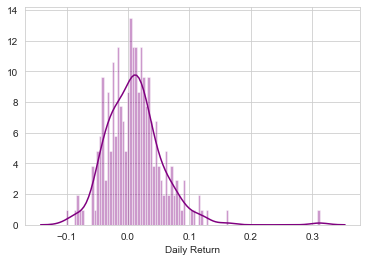

In [79]:
sns.distplot(HIBB['Daily Return'].dropna(),bins=100,color='purple')

In [81]:
retss['HIBB'].quantile(0.05)

-0.0509268834511199

In [68]:
days = 365
dt = 1/days
mu = retss.mean()['HIBB']
sigma = retss.std()['HIBB']
start_price = 569.85

In [69]:
runss = 10000
simulationss = np.zeros(runs)
np.set_printoptions(threshold=5)

for r in range(runss):    
    simulationss[r] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

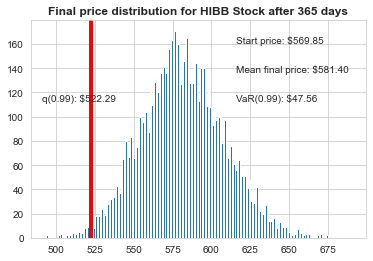

In [71]:
qt = np.percentile(simulationss, 1)
plt.hist(simulationss,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulationss.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - qt,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % qt)
plt.axvline(x=qt, linewidth=4, color='r')
plt.title(u"Final price distribution for HIBB Stock after %s days" % days, weight='bold');

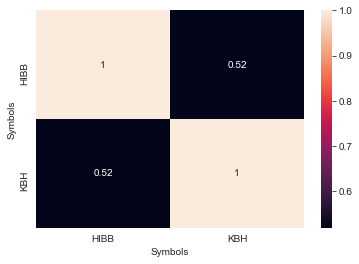

In [75]:
sns.heatmap(non_tech_rets.corr(), annot=True)